Assignment_567

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn import metrics

Assignment6

In [2]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

In [3]:
df.head()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


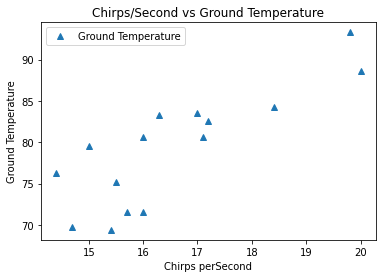

In [16]:
df.plot(x='Chirps/Second', y='Ground Temperature', style='^')
plt.title('Chirps/Second vs Ground Temperature')
plt.xlabel('Chirps perSecond')
plt.ylabel('Ground Temperature')
plt.show()

In [5]:
df.corr()

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


Correlation is 0.832042. This shows strong linear relationship between chirp/sec and ground temperature.So no transformation is required. We can apply linear regression as target variable is continues.

In [6]:
x = df.iloc[:, :-1].values #Features as arrays
y = df.iloc[:, 1].values #Target as arrays
#Split the data into train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 777)

In [7]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() # Predicted temperature = m * chirps/second + c  
"Symtax : varName = ModelName(modelHyperParams)"
regressor.fit(X_train, y_train) #Learning happens - GD is done and we get the final values of m and c

LinearRegression()

In [8]:
X_train.shape, X_test.shape

((12, 1), (3, 1))

In [9]:
c=regressor.intercept_ # c
print(c)

26.013262411347533


In [10]:
m=regressor.coef_ # the final learnt model is Predicted temperature = 3.23829787 *Chirps/second + 26.01326241134754
print(m)

[3.23829787]


In [11]:
y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions
"Syntax : varName.predict(test_features)"
y_pred
df1=pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
df1

,y_test,y_pred
0,69.4,75.883050
1,80.6,77.826028
2,75.2,76.206879


The Linear Regression equation for Cricket chirps/second vs Temperature dataset(hat{y}=3.23*Chirps/second + 26.01)

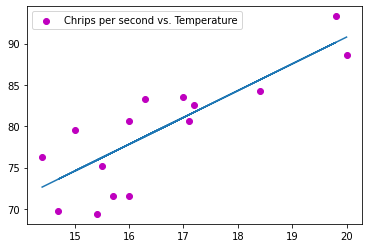

In [17]:
plt.scatter(x, y, c='m', label='Chrips per second vs. Temperature')
plt.plot(x, m*x + c)
plt.legend()
plt.show()

In [18]:
from sklearn.metrics import r2_score
print('R2 :', np.sqrt(metrics.r2_score(y_test, y_pred)))

R2 : 0.43746184023063245


R2 score is 0.43 here that means the equation is not a good fit for the model.Since there is low number of data points available for training and testing. We can increase R2 score if we take the data only for training.

In [19]:
#We are considering all the datapoints for training and let us see the R2 score.
 
a = df[['Ground Temperature']]
b = df['Chirps/Second']
regression=linear_model.LinearRegression()
regression.fit(a,b)
print('intercept:', regression.intercept_)
print('coefficient:', regression.coef_) 

intercept: 0.4593146452359562
coefficient: [0.20299973]


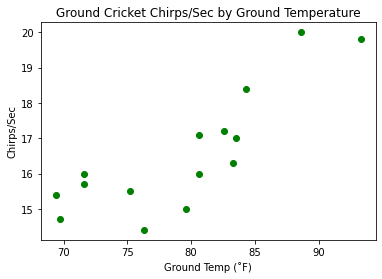

In [27]:
m=regression.predict(a)
plt.scatter(a, b, color='g')
plt.title('Ground Cricket Chirps/Sec by Ground Temperature')
plt.xlabel('Ground Temp (˚F)')
plt.ylabel('Chirps/Sec')
plt.show()

Linear Regression equation for Ground Cricket Chirps dataset.
y = 0.2030 * x + 0.4593

In [28]:
print('r-squared: ', regression.score(a,b))

r-squared:  0.6922946529147


When we don't split the data as test and train the R2 score value increased to 0.69.This means if there is more data that we train the model the better it will be.

In [31]:
t=regression.predict([[96]])
print('At 95˚F, our approximation of chirps/sec is:',int(t))

At 95˚F, our approximation of chirps/sec is: 19


C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [32]:
r=(17 - regression.intercept_) / regression.coef_
print('With an observation of 18 chirps/sec,we expect ground temp =',"{:.4f}".format(float(r)),'F')

With an observation of 18 chirps/sec,we expect ground temp = 81.4813 F


ASSIGNMENT 6

In [34]:
df_bw = pd.read_fwf("brain_body.txt")
df_bw.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [35]:
x = df_bw[['Body']]
y = df_bw['Brain']

In [36]:
linear = linear_model.LinearRegression()
linear.fit(x, y)

LinearRegression()

In [37]:
print('intercept:', linear.intercept_)
print('coefficient:', linear.coef_)

intercept: -56.85554542859637
coefficient: [0.90291295]


The Linear Regression equation for Brain vs.Body Weight dataset is (hat{y}=0.902*Bodyweight+ -56.855)

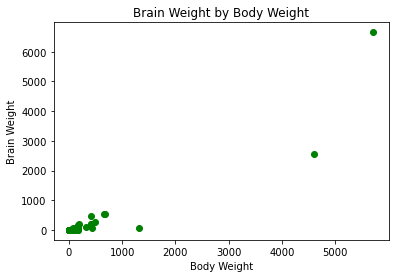

In [44]:
plt.scatter(x, y, color='g')
plt.title('Brain Weight by Body Weight')
plt.xlabel('Body Weight')
plt.ylabel('Brain Weight')
plt.show()

In [45]:
print('R^2 score for this equation: {:.4f}'
      .format(linear.score(x, y)))

R^2 score for this equation: 0.8727


The R^2 score is greater than 0.8, so the equation is a good fit for this data

ASSIGNMENT 7

In [46]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [47]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [48]:
df.corr()

,Sex,Rank,Year,Degree,YSdeg,Salary
Sex,1.000000,-0.230411,-0.379404,0.077112,-0.088288,-0.252782
Rank,-0.230411,1.000000,0.507980,-0.014564,0.695724,0.867488
Year,-0.379404,0.507980,1.000000,-0.143377,0.638776,0.700669
Degree,0.077112,-0.014564,-0.143377,1.000000,-0.482836,-0.069726
YSdeg,-0.088288,0.695724,0.638776,-0.482836,1.000000,0.674854
Salary,-0.252782,0.867488,0.700669,-0.069726,0.674854,1.000000


In [49]:
feature = ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']
x = df[feature]
y = df.Salary
lr = linear_model.LinearRegression()
lr.fit(x, y)

LinearRegression()

In [50]:
print('Features & Coefficients')
print(list(zip(feature, lr.coef_)))

Features & Coefficients
[('Sex', 1241.7924996014403), ('Rank', 5586.181449521445), ('Year', 482.8597678288221), ('Degree', -1331.6440634059168), ('YSdeg', -128.7905735448632)]


In [51]:
lr.intercept_

11410.146547255606

In [52]:
print('The equation for columns {} with respect to Salary:\n'
          '{} + {}'.format(feature, lr.coef_,lr.intercept_))

The equation for columns ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg'] with respect to Salary:
[ 1241.7924996   5586.18144952   482.85976783 -1331.64406341
  -128.79057354] + 11410.146547255606


In [53]:
def lin_r2(feature, df, sal='Salary'):
    input = df[feature]
    output = df[sal]
    lr = linear_model.LinearRegression()
    lr.fit(input,output)
    return lr.score(input,output)
print('R^2 score for equation using all columns: {}'.format(lin_r2(feature,df)))

R^2 score for equation using all columns: 0.8547180674410969


In [54]:
import itertools as it #Itertools is a module in python, it is used to iterate over data structures that can be stepped over using a for-loop.
# Such data structures are also known as iterables.
#itertools.combinations() module in Python to print all possible combinations
def get_combo(cols):
    return [it.combinations(cols, n + 1) for n in range(len(cols))]

combos = get_combo(feature)
def all_combo_scores(combos, df, focus='Salary'):
    combo_scores = {}
    for m in range(len(list(combos))):
        for n in list(combos[m]):
            combo_scores[lin_r2(list(n), df, focus)] = n
    return combo_scores
combo_scores = all_combo_scores(combos, df)
sorted(combo_scores.items(), key=lambda c: c[0], reverse=True)

[(0.8547180674410969, ('Sex', 'Rank', 'Year', 'Degree', 'YSdeg')),
 (0.8490366192262851, ('Sex', 'Rank', 'Year', 'YSdeg')),
 (0.8485077204335425, ('Rank', 'Year', 'Degree', 'YSdeg')),
 (0.8456725764485598, ('Rank', 'Year', 'YSdeg')),
 (0.845547641297936, ('Sex', 'Rank', 'Year', 'Degree')),
 (0.8454319861987166, ('Sex', 'Rank', 'Year')),
 (0.8437395200874137, ('Rank', 'Year', 'Degree')),
 (0.8436480933264598, ('Rank', 'Year')),
 (0.7671813414350668, ('Sex', 'Rank', 'Degree', 'YSdeg')),
 (0.7666122610227071, ('Sex', 'Rank', 'YSdeg')),
 (0.7625149185326454, ('Rank', 'Degree', 'YSdeg')),
 (0.7623948189698249, ('Rank', 'YSdeg')),
 (0.7583144768153612, ('Sex', 'Rank', 'Degree')),
 (0.7557961688386643, ('Rank', 'Degree')),
 (0.7554917749443394, ('Sex', 'Rank')),
 (0.7525360539274633, ('Rank',)),
 (0.6311597502907434, ('Sex', 'Year', 'Degree', 'YSdeg')),
 (0.6236261611533505, ('Year', 'Degree', 'YSdeg')),
 (0.5832708257660315, ('Sex', 'Degree', 'YSdeg')),
 (0.5808063918180405, ('Sex', 'Year', 

R2 score including all feature = 0.8547 but there is two dominant factors "Rank" & "Year" itself scores 0.8436
Sex on its own has a score very close to zero (0.063898925832880038), indicating that it has no direct influence on salary.